# <center><u> Spam Email Detection Using Average Word2Vec </u></center>

<center>
    <img src="https://miro.medium.com/max/1105/1*nBgCTU_hAVG00eYkcRf6Mw.png">
</center>

In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv


## <center> Observing Data</center>

<center>
    <img src="https://lh3.googleusercontent.com/proxy/5nM_9EbJxrsKFCdJrhx76zjWyK8L9XNT5ROMU3FS-YutloIdQU0dLNAg8AJEjoCKWc-OBerjmgYvTgZBSds_ADOy"/>
</center>

### Looking at Top 5 records in the Data

In [2]:
df=pd.read_csv('/kaggle/input/spam-mails-dataset/spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


### Understanding the datatypes of the columns in the dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


### Checking Whether the Data contains any Null Values

In [4]:
df.isna().sum()

Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64

### Composition of Spam and Ham mails in the Data using simple CountPlot of Seaborn

<AxesSubplot:xlabel='label', ylabel='count'>

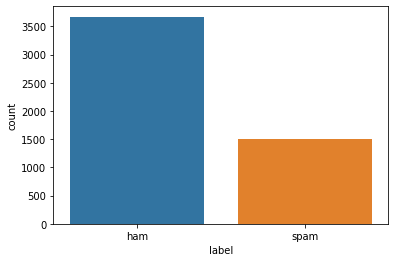

In [5]:
import seaborn as sns
sns.countplot(x="label",data=df)

## <center> Data Cleaning </center>

<center>
<img src="https://exceldashboardschool.com/wp-content/uploads/2020/01/how-to-clean-data-in-excel-the-ultimate-guide.png">
</center>

In [6]:
print(df['text'][0])

Subject: enron methanol ; meter # : 988291
this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary
flow data provided by daren } .
please override pop ' s daily volume { presently zero } to reflect daily
activity you can obtain from gas control .
this change is needed asap for economics purposes .


In [7]:
!pip install contractions

     |████████████████████████████████| 284 kB 288 kB/s 
     |████████████████████████████████| 321 kB 3.6 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=102814 sha256=0e749893aaa09c024677cddb14025a94ea519b2cde5857b2b07ae62dd01e5a2f
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [8]:
import contractions
#contractions is the package in python used to expand the contractions in english language to their original form. Example: I'll to "I will"
from tqdm import tqdm
#tqdm package is used to track the progress of work. It displays the percentage of loop done.
import nltk
#nltk is a suite of libraries that are mainly used for dealing with problems related to Natural language processing.
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
#donwloadin the stopwords of english language
stopwords=stopwords.words('english')
#Removing stopwords 'no','nor' and 'not'
stopwords.remove('no')
stopwords.remove('nor')
stopwords.remove('not')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
processed_mails=[]
for i in tqdm(df['text']):
    #Regular expression that removes all the html tags pressent in the reviews
    i=re.sub('(<[\w\s]*/?>)',"",i)
    #Expanding all the contractions present in the review to is respective actual form
    i=contractions.fix(i)
    #Removing all the special charactesrs from the review text
    i=re.sub('[^a-zA-Z0-9\s]+',"",i)
    #Removing all the digits present in the review text
    i=re.sub('\d+',"",i)
    #Making all the review text to be of lower case as well as removing the stopwords and words of length less than 3
    processed_mails.append(" ".join([j.lower() for j in i.split() if j not in stopwords and len(j)>=3]))

100%|██████████| 5171/5171 [00:02<00:00, 2444.09it/s]


### Creating a Dataframe using all the cleaned Mails

In [10]:
#Creating a new datafram using the Processed Reviews
processed_df=pd.DataFrame({'text':processed_mails,'Spam/Ham':list(df['label_num'])})
processed_df.head()

,text,Spam/Ham
0,subject enron methanol meter follow note gave ...,0
1,subject hpl nom january see attached file hpln...,0
2,subject neon retreat around wonderful time yea...,0
3,subject photoshop windows office cheap main tr...,1
4,subject indian springs deal book teco pvr reve...,0


## <center> Data Preparation </center>

In [11]:
#Splitting the data into dependent and independent variables i.e, features and the target columns
X=processed_df['text']
Y=processed_df['Spam/Ham']
#Splitting the data such that 33% will be used for testing and the remaining 67% will be used for training. 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.33)
#when stratify is provided the splitting of data into train and test datasets agree with the composition of actual possitive and negative reviews present in the dataset

#### Word2Vec is a neural network model, that provides a numerical vector representation for a given word. This numerical vector is often called as "Word Embedding". Despite other methods of Bag of Words and TF-IDF, Word2Vec takes the context of the word into consideration while converting a word to a numerical vector. 

In [12]:
from gensim.models import Word2Vec

<center>
    <img src="https://devopedia.org/images/article/221/4080.1570464995.png"/>
</center>

## Creating the data for training the Word2Vec model

Word2Vec model takes a list of lists as input for training. In our case, every mail should be divided into a list of words and all such lists must be appended to an empty list so that the data is ready for training.

In [13]:
words_in_sentences=[]
for i in tqdm(x_train):
    words_in_sentences.append(i.split())

100%|██████████| 3464/3464 [00:00<00:00, 94418.79it/s]


### Training a Word2Vec Model with our Custom data

In [14]:
model = Word2Vec(sentences=words_in_sentences, vector_size=200,workers=-1)

## Printing all similar words in the vocabulary for a given random word present in our vocabulary

In [15]:
model.wv.most_similar('lottery', topn=10)

[('alcohol', 0.22900035977363586),
 ('income', 0.22816285490989685),
 ('percentage', 0.22543984651565552),
 ('minhplno', 0.22505630552768707),
 ('superviagra', 0.22137801349163055),
 ('sildenafil', 0.22072188556194305),
 ('tion', 0.22063365578651428),
 ('page', 0.22007966041564941),
 ('resuits', 0.21976976096630096),
 ('trading', 0.2166709154844284)]

## Word Embedding for a given word

In [16]:
model.wv.get_vector('job')

array([-1.08816626e-03, -3.42516066e-03,  3.85873672e-03,  1.15641356e-04,
       -2.44918233e-03, -4.78837732e-03,  4.19341074e-03, -4.06911597e-03,
        1.95204979e-03, -2.83501158e-03, -1.07368466e-03,  3.44471098e-03,
        8.16944812e-04,  4.26235097e-03,  2.30885751e-04,  1.04559422e-03,
       -1.37395260e-03, -2.48146057e-03, -1.00439785e-04,  1.19922520e-03,
       -4.09225235e-03,  4.79355920e-03, -3.80116585e-03, -7.80194998e-04,
        3.18465475e-03, -4.41514142e-03,  1.98469753e-03, -3.11680674e-03,
       -4.41523688e-03,  4.52372059e-03,  3.63322138e-03, -9.66544147e-04,
       -1.77200790e-03, -1.71767117e-03, -4.59202891e-03, -2.92758830e-03,
       -2.20351573e-03, -2.18172441e-03, -3.74762062e-03, -1.81430578e-03,
       -3.77277494e-03,  9.39861522e-04,  2.07851292e-03, -8.49149248e-04,
       -4.13390389e-03,  3.59839550e-03, -5.37232147e-04, -9.34394600e-04,
        4.62583918e-03,  3.80288367e-03,  2.19035870e-03, -1.84114813e-03,
        4.88167536e-03, -

## Total number of words in the Vocabulary on which the Word2Vec model is trained.

In [17]:
vocab=list(model.wv.key_to_index.keys())
print(len(vocab))

6649


## Average Word2Vec for converting a given Sentence into numerical vector. 

Note: Word2Vec is capable of providing an embedding for a given word but not for a sentence

<center>
    <img src="https://i0.wp.com/yaronvazana.com/wp-content/uploads/2018/09/average-vectors.png?resize=698%2C354">
</center>

### **Average Word2Vec is a technique in which the average of word embeddings of all the words given in a sentence is used as the numerical vector for a given sentence.**

In [18]:
def avg_w2vec(sentences):
    transformed=[]
    for sentence in tqdm(sentences):
        count=0
        vector=np.zeros(200)
        for word in sentence.split():
            if word in vocab:
                vector+=model.wv.get_vector(word)
                count+=1
        if count!=0:
            vector/=count
            transformed.append(vector)
        else:
            print(sentence)
    return np.array(transformed)

In [19]:
x_train_transformed=avg_w2vec(x_train)
x_test_transformed=avg_w2vec(x_test)

100%|██████████| 1707/1707 [00:05<00:00, 318.37it/s]


## Using K-Nearest Neighbors Algorithm to predict whether a given mail is Spam or not

<center>
    <img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/Knn_k1_z96jba.png"/>
    </center>

In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid_params = { 'n_neighbors' : [10,20,30,40,50,60],
               'metric' : ['manhattan']}
knn=KNeighborsClassifier()
clf = RandomizedSearchCV(knn, grid_params, random_state=0,n_jobs=-1,verbose=1)
clf.fit(x_train_transformed,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.7s finished


RandomizedSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
                   param_distributions={'metric': ['manhattan'],
                                        'n_neighbors': [10, 20, 30, 40, 50,
                                                        60]},
                   random_state=0, verbose=1)

In [21]:
clf.best_params_

{'n_neighbors': 10, 'metric': 'manhattan'}

In [22]:
clf.best_score_

0.7982066745072525

In [23]:
clf.cv_results_

{'mean_fit_time': array([0.07366505, 0.07172437, 0.0677135 , 0.06882086, 0.0704308 ,
        0.06964426]),
 'std_fit_time': array([0.0036415 , 0.0049972 , 0.00091277, 0.00101656, 0.00287808,
        0.00145807]),
 'mean_score_time': array([1.22993546, 1.41144609, 1.24042358, 1.23959513, 1.2854876 ,
        1.13555822]),
 'std_score_time': array([0.08687633, 0.12765505, 0.00435392, 0.00441002, 0.02044739,
        0.19104584]),
 'param_n_neighbors': masked_array(data=[10, 20, 30, 40, 50, 60],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_metric': masked_array(data=['manhattan', 'manhattan', 'manhattan', 'manhattan',
                    'manhattan', 'manhattan'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10, 'metric': 'manhattan'},
  {'n_neighbors': 20, 'metric': 'manhattan'},
  {'n_neighbors': 30, 'metric': 'manh

# <center><b> Model Evaluation </b></center>

<center>
    <img src="https://miro.medium.com/max/1400/1*f-k9vMJGKqctXjvO8dM-UQ.gif"/>
</center>

## Plotting the ROC curve for the prediction on both Training and Testing Data

In [24]:
from sklearn.metrics import roc_curve, auc,classification_report,confusion_matrix
train_fpr,train_tpr,thresholds=roc_curve(y_train,clf.predict_proba(x_train_transformed)[:,1])
test_fpr,test_tpr,thresholds=roc_curve(y_test,clf.predict_proba(x_test_transformed)[:,1])

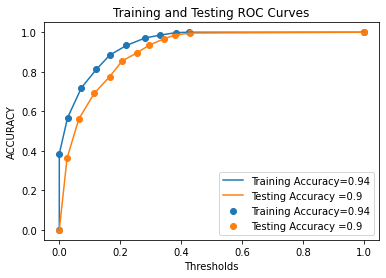

In [25]:
import matplotlib.pyplot as plt
plt.plot(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.plot(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.scatter(train_fpr,train_tpr,label="Training Accuracy="+str(round(auc(train_fpr, train_tpr),2)))
plt.scatter(test_fpr,test_tpr,label="Testing Accuracy ="+str(round(auc(test_fpr, test_tpr),2)))
plt.legend()
plt.xlabel("Thresholds")
plt.ylabel("ACCURACY")
plt.title("Training and Testing ROC Curves")
plt.show()

## Confusion Matrix and Classification Report for Prediction made on Training and Testing data

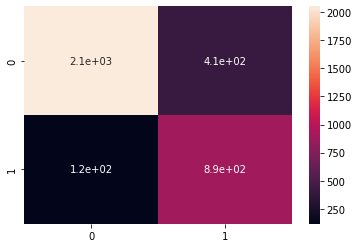

In [26]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train_transformed)),annot=True)
plt.show()

In [27]:
print(classification_report(y_train,clf.predict(x_train_transformed)))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      2460
           1       0.69      0.88      0.77      1004

    accuracy                           0.85      3464
   macro avg       0.82      0.86      0.83      3464
weighted avg       0.87      0.85      0.85      3464



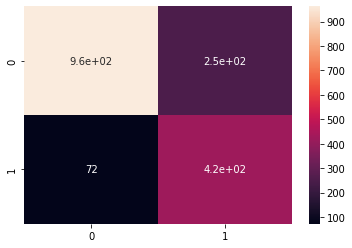

In [28]:
sns.heatmap(confusion_matrix(y_test,clf.predict(x_test_transformed)),annot=True)
plt.show()

In [29]:
print(classification_report(y_test,clf.predict(x_test_transformed)))

              precision    recall  f1-score   support

           0       0.93      0.79      0.86      1212
           1       0.63      0.85      0.72       495

    accuracy                           0.81      1707
   macro avg       0.78      0.82      0.79      1707
weighted avg       0.84      0.81      0.82      1707



# **Conclusion**
### In case of Spam mail Detection, we will more focus of False Possitives. This is so because, In case of False-Possitive the model will predict the unspam mail as a spam which results in loss of some useful data. If the ham mail that was recognised as spam contain any important information, it will not be reached to the user.
### The model that was obtained in this notebook has very less False possitive when compare to False Negatives.

# <center style="color:red"> <b> &#127881;&#127882;<u> Upvote the notebook if it is useful and Informative. </u>&#127881; &#127882;</b></center>